In [925]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_dr7_quasar
import astropy

#-------------------------------------------------------
# Fetch the quasar data
data = fetch_dr7_quasar()

# Select the first 10000 points
Ndata = 10000
data = data[:Ndata]

# Select redshift data
z = data['redshift']

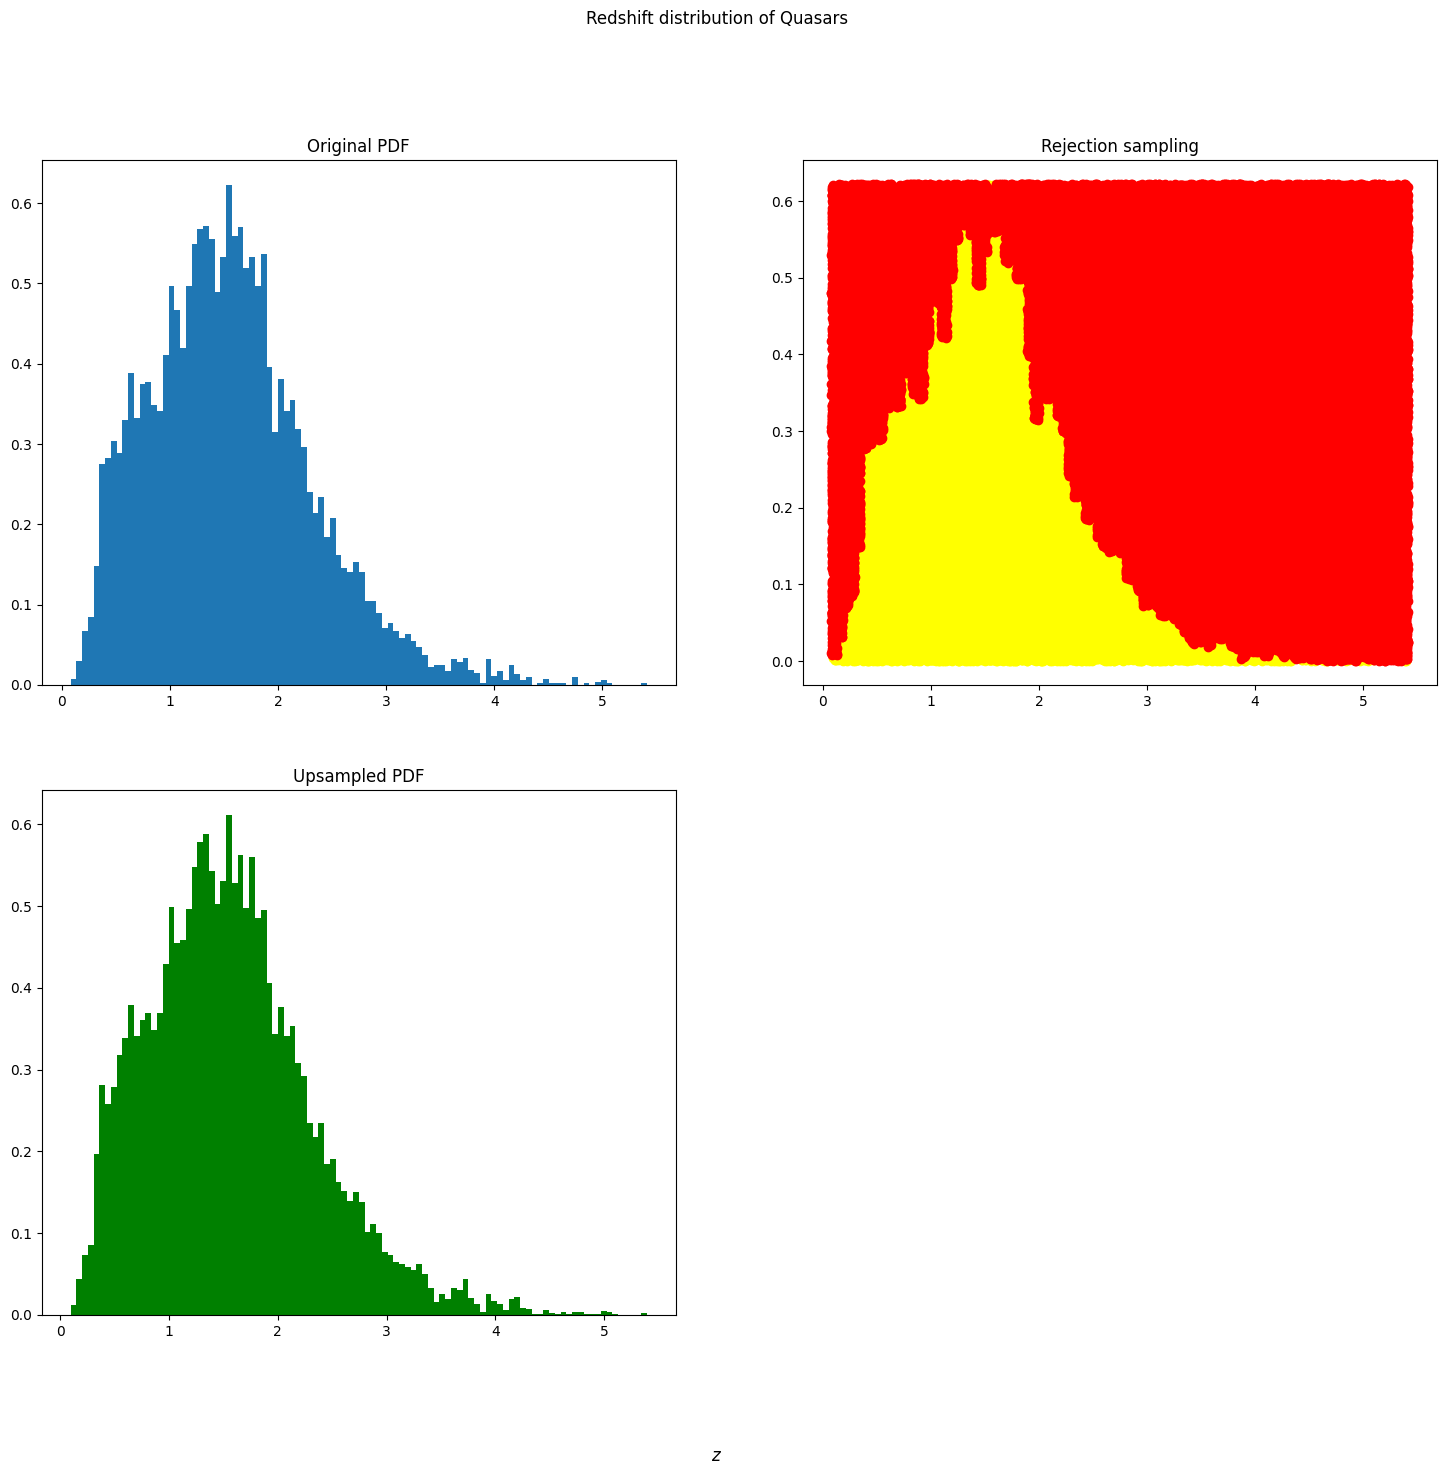

In [926]:
# Plot the data
fig, ax = plt.subplots(2, 2, figsize=(18,15))
fig.suptitle("Redshift distribution of Quasars")
fig.supxlabel("$z$")
ax[1][1].set_visible(False)

ax[0][0].set_title("Original PDF")
nbins = 100
entries, bins, hist_patches = ax[0][0].hist(z, nbins, density=True)

#-------------------------------------------------------------------
# Set the values of the boundary of the box of uniform distributed numbers
min_z = np.min(bins)
max_z = np.max(bins)
min_freq = 0
max_freq = np.max(entries)

# Generate the points in the box
N_points = 100000
x = np.random.uniform(min_z, max_z, N_points)
y = np.random.uniform(min_freq, max_freq, N_points)

# Create an "x" shaped array to store the maximum acceptable values of y for every x
y_max = np.array([])

# For every x, y_max is the value of the entry of the histogram corresponding to that x
# np.where(bins<x[i]) returns an array ((bins), ()) containing the indexes of "bins" where
# its content is less than x[i]. "bins" contains the left edges of the bins and the last element
# is the right edge of the last bin. The lenght of "bins" is nbins + 1
# Since "bins" is sorted, the last element of np.where(bins<x[i])[0] is the index of the bin
# corresponding to x[i]. "entries" at that index is the eight of the distribution at x[i]
for i in range(N_points):
    # np.append() just reuturns a new array, without modifying the original one
    index = np.where(bins<x[i])[0][-1]
    y_max = np.append(y_max, entries[index])

#-----------------------------------------------------------------------------------------
# Plot the generated points with different colors 
ax[0][1].set_title("Rejection sampling")
ax[0][1].scatter(x[y<y_max], y[y<y_max], c='yellow')
ax[0][1].scatter(x[y>y_max], y[y>y_max], c='red')

# Plot the upsampled distribution
ax[1][0].set_title("Upsampled PDF")
ax[1][0].hist(x[y<y_max], nbins, density=True, color='green')

plt.show()

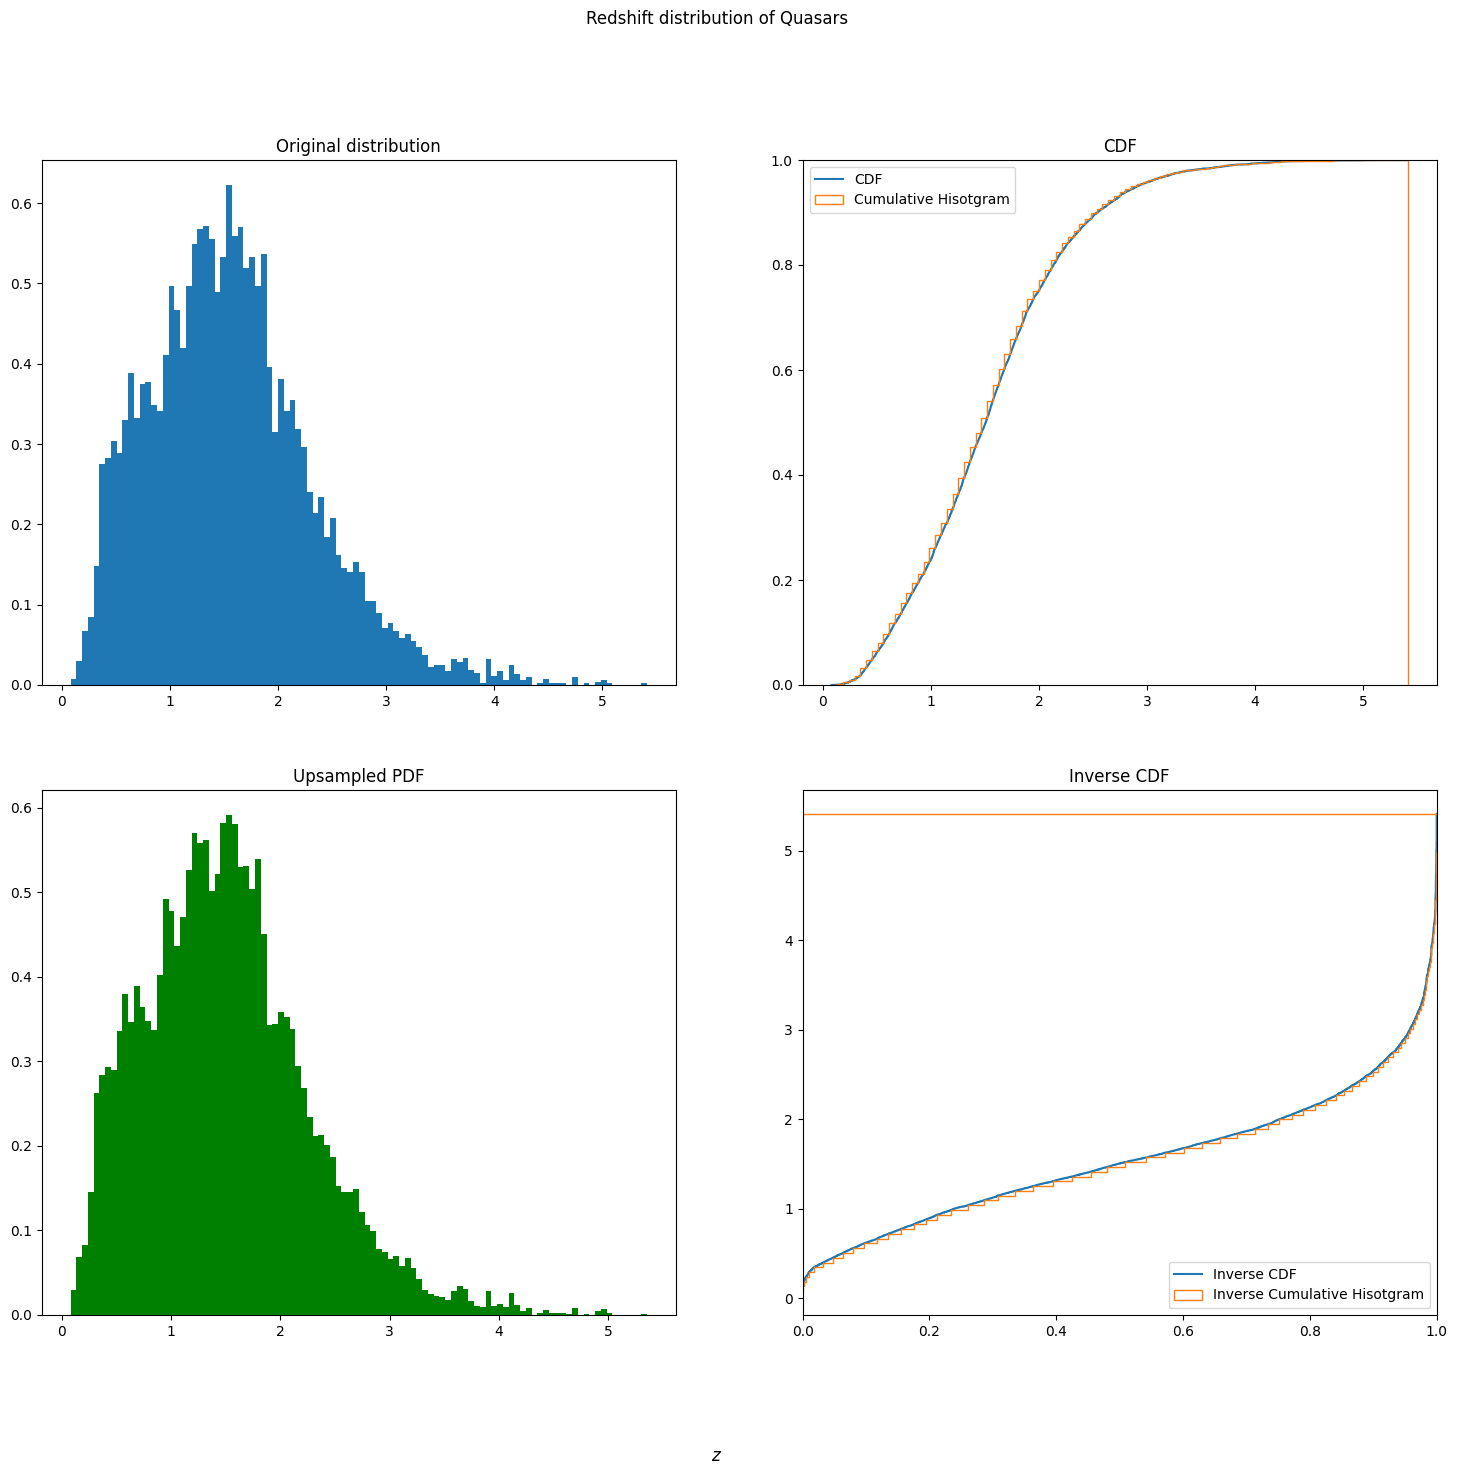

In [927]:
# Plot the data
fig, ax = plt.subplots(2, 2, figsize=(18,15))
fig.suptitle("Redshift distribution of Quasars")
fig.supxlabel("$z$")

# Original distribution
ax[0][0].set_title("Original distribution")
nbins = 100
ax[0][0].hist(z, nbins, density=True)

# Cumulative distribution
ax[0][1].set_title("CDF")
ax[0][1].ecdf(z, label="CDF")
ax[0][1].hist(z, nbins, density=True, histtype="step", cumulative=True, label="Cumulative Hisotgram")
ax[0][1].legend()

# Inverse cumulative distribution
ax[1][1].set_title("Inverse CDF")
ax[1][1].ecdf(z, orientation="horizontal", label="Inverse CDF", )
c_entries, c_bins, c_hist_patches = ax[1][1].hist(z, nbins, density=True, histtype="step", cumulative=True,
                                            orientation="horizontal", label="Inverse Cumulative Hisotgram")
ax[1][1].legend()

#-----------------------------------------------------------------------------------------------
# Set the values of the minimum and maximum probability density of the original distribution
min_prob = np.min(c_entries)
max_prob = np.max(c_entries)

# Generate probabilities form the minimum to the maximum of the original distribution
N_points = 100000
prob = np.random.uniform(min_prob, max_prob, N_points)

# Create anarray to store the x values of the distribution with a CDF = prob
x_prob = np.array([])

# Compute x using the same tecnique used for y_max in the Rejection sampling
for i in range(N_points):
    index = np.where(c_entries<prob[i])[0][-1]
    # Randomize x inside the found bin to avoid empty zones (c_entries contains the left edge of bins)
    x_prob = np.append(x_prob, np.random.uniform(c_bins[index], c_bins[index+1]))

ax[1][0].set_title("Upsampled PDF")
ax[1][0].hist(x_prob, nbins, density=True, color='green')

plt.show()


In [928]:
astropy.cosmology.Planck18

FlatLambdaCDM(name='Planck18', H0=<Quantity 67.66 km / (Mpc s)>, Om0=0.30966, Tcmb0=<Quantity 2.7255 K>, Neff=3.046, m_nu=<Quantity [0.  , 0.  , 0.06] eV>, Ob0=0.04897)